In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Import Data

In [2]:
df=pd.read_csv(r'C:\Users\zbcprx\Documents\Bryan new files\Python\Data sets\winequality-white.csv',sep=';')
df.head()

##Data Insight

In [8]:
df.shape

(4898, 12)

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Check if there is null using info

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Since all has 4898 non-null values, hence there is no null value

##Understanding target variable

In [17]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [15]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

#Data Visualization

##Check for missing values using sns heatmap. Missing values would show as white bars.

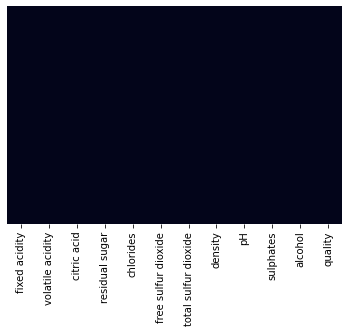

In [21]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)
plt.title('')

Plot shows that there are no missing values.

##Check for the correlation of the variables

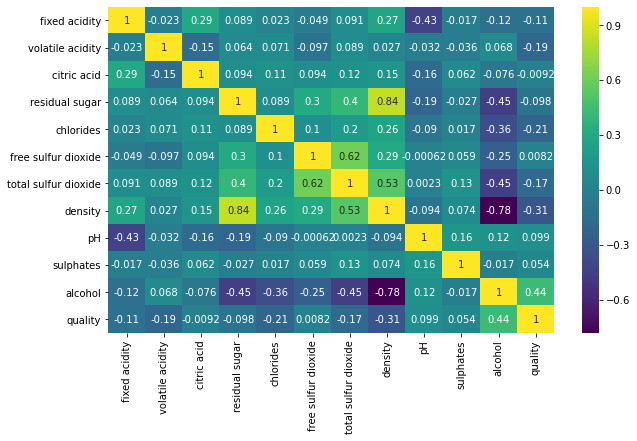

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.sort_values(by='quality',ascending=True).corr(),cmap='viridis',annot=True)

From the correlation matrix, we can see that density and residual sugar is strong correlated.
Citric acid and Free Sulfur Dioxide has almost no impact to quality. We can drop these 2 features if we are using Linear Regression.

##Check for outliers

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


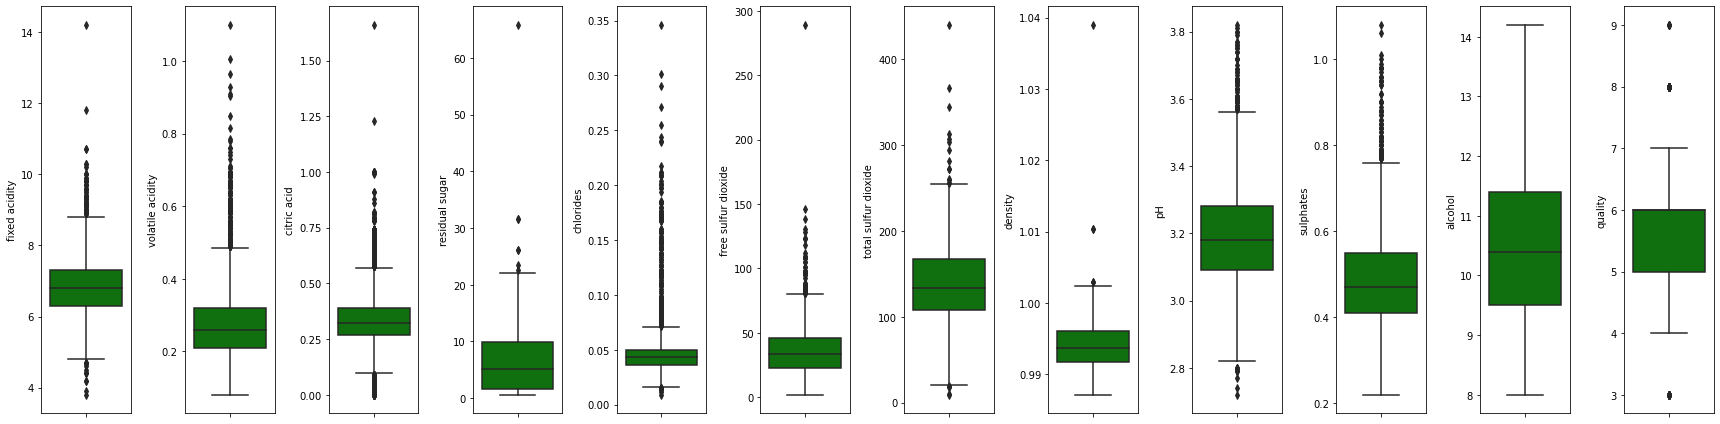

In [94]:
cols=df.columns.values
l=len(cols)
plt.figure(figsize=(24,6))
print(cols)
for i in range(0,l):
    plt.subplot(1,l,i+1)
    sns.boxplot(df[cols[i]],orient='v',color='green')
    plt.tight_layout()

All except alcohol shows outliers. 

#Check data skewedness

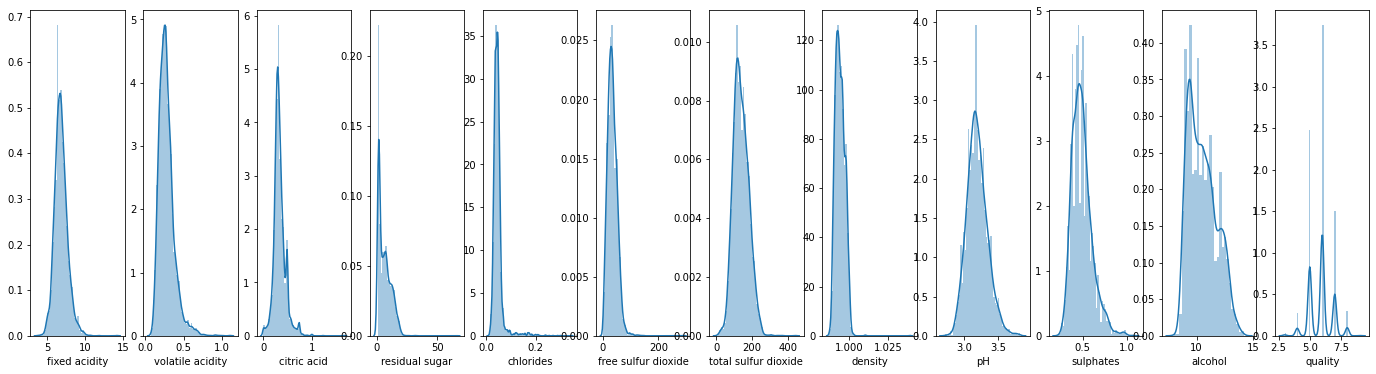

In [100]:
plt.figure(figsize=(24,6))
for i in range(0,l):
    plt.subplot(1,l,i+1)
    sns.distplot(df[cols[i]])

In [ ]:
pH column seems to be the only normally distributed feature.
All other features are right-skewed.